<a href="https://colab.research.google.com/github/ask350/UM-Projects/blob/main/Animal%20Classification/Animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown split_folders tensorflow pillow

import gdown
import splitfolders
import os
import zipfile

url = "https://drive.google.com/file/d/1wYI97Ne35zFL6XRVDiDC9VVgSnHPqNaY/view?usp=sharing"
output = "animalclass_dataset.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1wYI97Ne35zFL6XRVDiDC9VVgSnHPqNaY
From (redirected): https://drive.google.com/uc?id=1wYI97Ne35zFL6XRVDiDC9VVgSnHPqNaY&confirm=t&uuid=e6b3b742-166e-470b-9f51-6af5c610525b
To: /content/animalclass_dataset.zip
100%|██████████| 38.2M/38.2M [00:00<00:00, 43.0MB/s]


'animalclass_dataset.zip'

In [2]:
with zipfile.ZipFile("animalclass_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("✅ Dataset extracted successfully!")

#Check the dataset structure

print("📁 Folder structure inside 'dataset':")
print(os.listdir("dataset"))

✅ Dataset extracted successfully!
📁 Folder structure inside 'dataset':
['animlalclass_dataset']


In [4]:
# split dataset

import os
import splitfolders

# Detect the real dataset folder 
possible_folders = []

for root, dirs, files in os.walk("dataset"):
    if len(dirs) > 0 and any(os.path.isdir(os.path.join(root, d)) for d in dirs):
        if any(
            os.path.exists(os.path.join(root, d)) and len(os.listdir(os.path.join(root, d))) > 0
            for d in dirs
        ):
            possible_folders.append(root)

print("🔍 Folders with subdirectories found:")
for i, folder in enumerate(possible_folders):
    print(f"{i+1}. {folder}")

# Choose the deepest folder containing the animal categories 
input_folder = possible_folders[-1]  # usually the last one is the correct dataset folder
print(f"\n✅ Using dataset folder: {input_folder}")

# Perform split 
splitfolders.ratio(
    input_folder,
    output="split_data",
    seed=42,
    ratio=(0.8, 0.2)
)

print("✅ Data split into train/validation folders successfully!")



🔍 Folders with subdirectories found:
1. dataset
2. dataset/animlalclass_dataset

✅ Using dataset folder: dataset/animlalclass_dataset


Copying files: 1944 files [00:00, 7309.46 files/s]

✅ Data split into train/validation folders successfully!


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

train_dir = "/content/split_data/train"
val_dir = "/content/split_data/val"

In [7]:
# Data Generators
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

Found 1549 images belonging to 16 classes.
Found 395 images belonging to 16 classes.


In [8]:
# STEP 4: Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,171,024 (42.61 MB)

 Trainable params: 11,171,024 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# STEP 5: Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.0767 - loss: 2.9581 - val_accuracy: 0.1924 - val_loss: 2.4846
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.2382 - loss: 2.3992 - val_accuracy: 0.3342 - val_loss: 2.1048
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.3865 - loss: 1.9280 - val_accuracy: 0.5063 - val_loss: 1.8143
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.5420 - loss: 1.4817 - val_accuracy: 0.5797 - val_loss: 1.5025
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.7001 - loss: 1.0092 - val_accuracy: 0.6253 - val_loss: 1.5729
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.7776 - loss: 0.8202 - val_accuracy: 0.6937 - val_loss: 1.3533
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.8330 - loss: 0.5867 - val_accuracy: 0.7316 - val_loss: 1.3777
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9012 - loss: 0.3727 - val_accuracy: 0.7165 - val_loss: 1.

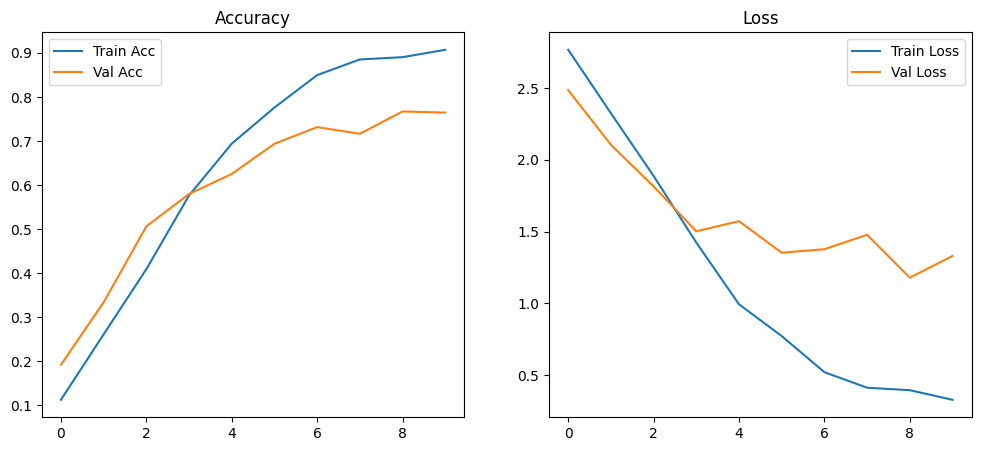

In [10]:
# STEP 6: Visualize accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

In [11]:
# STEP 7: Save the trained model to Drive
model.save("animal_classifier_model.keras")
print("Model saved to Drive!")


Model saved to Drive!


In [12]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import json
import matplotlib.pyplot as plt

In [19]:
# list of class names

train_dir = "split_data/train"

# Automatically detect class names (folder names)
class_names = sorted(os.listdir(train_dir))

# Save class names to a text file
with open("class_names.txt", "w") as f:
    json.dump(class_names, f)

print("✅ Class names saved successfully!")
print("Classes:", class_names)

✅ Class names saved successfully!
Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra', 'animlalclass_dataset']


In [20]:
#Load trained model and class names
model = tf.keras.models.load_model("animal_classifier_model.keras")

with open("class_names.txt", "r") as f:
    class_names = json.load(f)

📸 Selected Image: split_data/val/Bird/Bird_14_4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


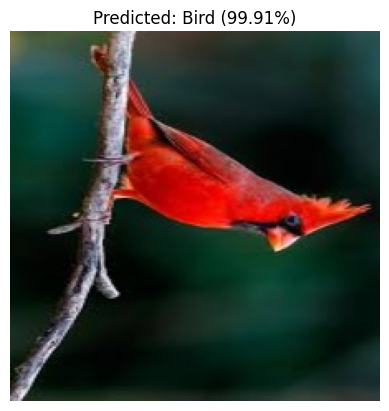

In [26]:
# Pick a random image from validation folder
val_dir = "split_data/val"
all_classes = os.listdir(val_dir)
random_class = random.choice(all_classes)
random_image_path = os.path.join(val_dir, random_class, random.choice(os.listdir(os.path.join(val_dir, random_class))))

print(f"📸 Selected Image: {random_image_path}")# Load and preprocess the image
img = Image.open(random_image_path).convert('RGB')
img_resized = img.resize(img_size)  # ✅ auto-match model’s input size
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_index]
confidence = round(float(np.max(predictions[0])) * 100, 2)

# Display result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class} ({confidence}%)")
plt.show()